## 寻找最优参数C和gamma
## 数据集：data/ex6data3.mat

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
mat = sio.loadmat('data/ex6data3.mat')
X, y = mat['X'], mat['y']                     #  训练集
Xval, yval = mat['Xval'], mat['yval']         #  验证集

In [3]:
def plot_data():
    plt.scatter(X[:,0],X[:,1],c = y.flatten(), cmap ='jet')
    plt.xlabel('x1')
    plt.ylabel('y1')

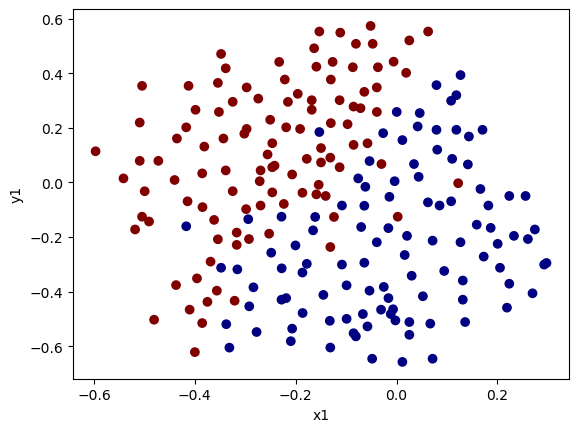

In [4]:
 plot_data()

In [5]:
Cvalues = [3, 10, 30, 100,0.01, 0.03, 0.1, 0.3,1 ]  #9
gammas =  [1 ,3, 10, 30, 100,0.01, 0.03, 0.1, 0.3]  #9

In [6]:
best_score = 0
best_params = (0,0)

for c in Cvalues:
    for gamma in gammas:
        svc = SVC(C=c,kernel='rbf',gamma=gamma)
        svc.fit(X,y.flatten())
        score = svc.score(Xval,yval.flatten())
        if score > best_score:
            best_score = score
            best_params = (c,gamma)
print(best_score,best_params)
        

0.965 (3, 30)


In [7]:
svc2 = SVC(C=0.3,kernel='rbf',gamma=100)
svc2.fit(X,y.flatten())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
def plot_boundary(model):
    x_min,x_max = -0.6,0.4
    y_min,y_max = -0.7,0.6
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),
                       np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

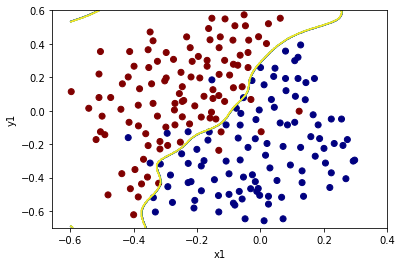

In [9]:
plot_boundary(svc2)
plot_data()